In [3]:
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
import seaborn as sns

sns.set_style("whitegrid")

# W3 E2

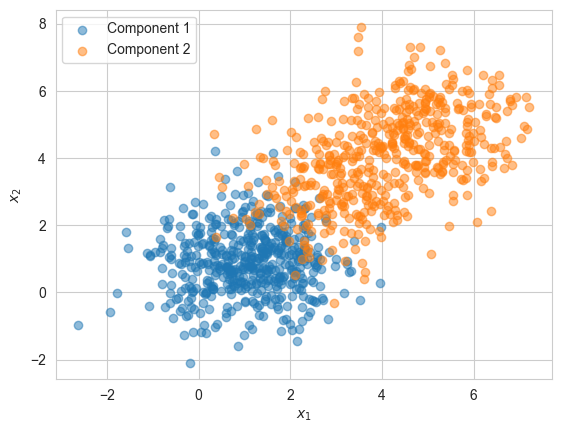

In [8]:
def gmm(n_samples=1):
    # Weights
    w = torch.tensor([0.5, 0.5])

    # Mean
    m1 = torch.tensor([1.0, 1.0])
    m2 = torch.tensor([3.0, 5.0])

    # StdD
    s1 = torch.tensor([1.0, 1.0])
    s2 = torch.tensor([1.0, 1.0])

    with pyro.plate("GMM", n_samples):
        Z = pyro.sample("Z1", pyro.distributions.Categorical(w))
        X1 = [
            pyro.sample("X1", pyro.distributions.Normal(m1[Z], s1[Z])),
            pyro.sample("X1", pyro.distributions.Normal(m1[Z], s1[Z])),
        ]
        X2 = [
            pyro.sample("X2", pyro.distributions.Normal(m2[Z], s2[Z])),
            pyro.sample("X2", pyro.distributions.Normal(m2[Z], s2[Z])),
        ]

    return X1, X2


gmm_samp = gmm(500)

plt.figure()
plt.scatter(gmm_samp[0][0], gmm_samp[0][1], alpha=0.5, label="Component 1")
plt.scatter(gmm_samp[1][0], gmm_samp[1][1], alpha=0.5, label="Component 2")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.savefig("figs/e2.png")